# Estimators and the Maximum Likelihood
***Readings: Emile-Geay 5.I-5.IV***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# These are some parameters to make figures nice (and big)

plt.rcParams['figure.figsize'] = 16,8
plt.rcParams['text.usetex'] = True
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Intro: Statistical Inference

The first module was concerned with modelling random processes and characterizing their output. That is, given a random process, what is the distribution of its output; how that distribution is described in terms of simple distributions functions and moments; and what happens when we only have a finite number of measurements (i.e. a finite sample). 

In other words, the first module was concerned with the domain of probability theory: ***going from process to data***.  

For the next two modules, and indeed for most of rest of the course, we will be concerned with the domain of statistical inference, which is the inverse problem: how to go ***from data back to process***. That is, how do we use data to infer the random process that gave rise to it. 

The goal of the infering the random process could be because we want to know something about the process itself - perhaps for pure scientific understanding - or because we want to use the random process to make a prediction. 

There are two basic ingredients to statistical estimation. First: the **data**, which can be thought of as a finite **sample** of the output of a random process. The data will generally be denoted by the data vector: 

$$\mathbf{x}=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{array}\right].$$


Second, a model of a ***random process*** that has generated the data. The random process is characterized by a set of **parameters** 

$$\mathbf{\theta}=\left[\begin{array}{c}
\theta_{1}\\
\theta_{2}\\
\vdots\\
x_{M}
\end{array}\right],$$

and a probability distribution function that describes what data generated from the process looks like, *given* (i.e. conditional on) a specific set of parameters. This probability is of the data conditional on parameters is called a ***likelihood** and it is denoted as:

$$ \mathcal{L}=p(x|\theta).$$


```Important
Statistical estimation deals with methods for estimating the parameters $\theta$ of the random processs. An estimate of a parameter $\theta$ is commonlty denoted as $\hat\theta$. 


Note that while the data is often given (i.e. a set of field obsevations or lab measurements), it is up to the scientist to choose an appropriate random process to model the data. 

```



# Likelihood

The probability distribution $p(x|\theta)$ of the data given parameters is called a likelihood. It describes how likely it is that we would observe the data $x$ given parameter $\theta$. 

## Example: Two coins
***Example: two coins*** Your have two coins. Each coin has a probability $\theta$ of hiting heads.Note that usually the probability of success for a bernoulli trial is denoted by $p$, but we will use $\theta$ here since that is the general notation for a parameter. 

One is fair (probability of heads is $\theta_1=0.5$) and one biased (probability of hitting heads is $\theta_2=0.65$). You close your eyes, and ask your friend to toss one of the coins 11 times, and write down the results, denoting heads by 1 and tails by 0. The outcome of the throw is:

$$x=[0,1,0,1,1,1,0,0,1,1]$$

You now have to decide which of the coins is the biased one. One way to decide is to ask which of the coins is more likely to have generated the data. I hope you agree that both of them *could* have generated the data. But which is more likely to have generated it? 

This is where the likelihood comes in. The likelihood allows you to calculate the probability that the first coin has produced the data, which is the probabiltiy of obtaining the data from a bernoulli trial with paramter $\theta_1$, written as:

$$p(x|\theta=\theta_1)=p(x|\theta_1)$$

as well as the probablity that the second coin produced the data, which would be written as:

$$p(x|\theta=\theta_2)=p(x|\theta_2)$$ 

Let's compute these probabilities. 

$$p(x|\theta_1)=p(x_1=0,x_2=1,x_3=0,\ldots,x_{11}=1|\theta=\theta_1)$$

Assuming that the outcome of one flip is independent of the outcome of another flip, we can use the rule for computing the probability of independent events 

$$p(x_1,x_2|\theta=\theta_1)=p(x_1|\theta=\theta_1)p(x_2|\theta=\theta_1),$$ 


Since the probability of hitting heads is $\theta_1$ itself, so $p(x_i=1|\theta=\theta_1)=\theta_1$ and $p(x_i=0|\theta=\theta_1)=1-\theta_1$  we have:

$$p(x|\theta=\theta_1)=p(x_1=0|\theta=\theta_1)p(x_2=1|\theta=\theta_1)p(x_3=0|\theta=\theta_1)\ldots p(x_{11}=1|\theta=\theta_1)$$

$$p(x|\theta=\theta_1)=(1-\theta_1)\cdot \theta_1\cdot (1-\theta_1)\cdot \ldots \theta_1$$

$$p(x|\theta=\theta_1)=\theta_1^{N_1}\cdot (1-\theta_1)^{N_0}$$

where $N_0$ and $N_1$ are the number of zeros (tails) and the number of ones (heads). We can do the same calculation to compute how likely it would be the second, biased, coin, and we would obtain:

$$p(x|\theta=\theta_2)=\theta_2^{N_1}\cdot (1-\theta_2)^{N_0}$$

Let's do the calculations:


In [2]:
p_theta_1=(0.5**6)*((1-0.5)**5)
p_theta_2=(0.65**6)*((1-0.65)**5)
print('p(x|theta_1)='+str(p_theta_1))
print('p(x|theta_2)='+str(p_theta_2))

p(x|theta_1)=0.00048828125
p(x|theta_2)=0.0003961141546044921


So the likelihood that the data was generated by a coin with $\theta=\theta_1=0.5$ is higher than the likelihood that it was generated by a coin with $\theta=\theta_2=0.65$. 

##  Example: Unknown coin / Infinetely many coins

You
went to the novelty store and bought yourself a biased coin. But you don't know the actual probability of it hitting heads or tails, and you want to estimate it. So you throw it N times and you record the outcome as $1$s (heads) or $0$ (tails). This gives you your data vector $\mathbf{x}$.

You can think of it as asking the questions: Let's say there are infinetely many coins, spanning the range of possible $\theta$s from $0$ to $1$. Which of these coins is most likely to have generated this data? So, rather than computing the likelihood for just two coins with known $\theta_1$ and]$\theta_2$ as in the previous example, we can compute it for any theta. If the data $\mathbf{x}$ contains $N_1$ ones and $N_0$ zeros, we can compute the likelihood as: 

$$\mathcal{L}=p(x|\theta)=\theta^{N_1}\cdot (1-\theta)^{N_0}$$

# Maximum Likelihood Estimator: MLE

A very common way to estimate $\theta$ is via the ***maximum likelihood estimator (MLE)***. This is the value of $\theta$ that maximizes the likelihood of obtaining the observed data:

$$\hat{\theta}_{MLE}=\text{argmax}_\theta \left[ \;p(\mathbf{x}|\theta)\;\right]$$

For the case of the single coin toss, the calculation is fairly straight forward. The MLE is obtained by setting the derivative of the likelihood to zero. 

$$\frac{d \mathcal{L}}{d\theta}=0$$

In case the parameter vector contains more than one parameters, then the likelihood equations become:

$$\frac{\partial \mathcal{L}}{\partial \theta_i}=0$$


## Biased Coin (Bernoulli Trial)

### Analytical Solution
For the case of the unknown coin, it can be easily shown that

$$\frac{d \mathcal{L}}{d\theta}=0 \Leftrightarrow \frac{d}{d\theta}\theta^{N_1}\cdot (1-\theta)^{N_0}=0$$

Thus

$$\hat{\theta}_{MLE}= \frac{N_1}{N_1+N_2}$$

### Numerical simulation.
A hallmark of this course is that we will evaluate the skill of our statistical approaches using synthetic data. In particular, we often want to check the **consistency** and **bias** of these estimators. While it is possible to derive these properties analytically for simple distributions (such as Bernoulli), that is beyond the scope of this course. It is also often impractical for more complex random processes that we might want to model. 

The bell below uses synthetic data (i.e. a **Monte Carlo** approach) to check how well the MLE estimator does. 

In [1]:
### Generate synthetic data for a biased coin

#Decide how many total coin flips you want 
Nflips=100

#choose a true probability theta
theta_true=0.65

#Flip the coin
x=stats.bernoulli.rvs(p=theta_true,size=Nflips)

#count the ones and zeros
N0=sum(x==0)
N1=sum(x==1)

# estimate theta using the MLE estimator
theta_hat=N1/(N0+N1)
print(theta_hat)



NameError: name 'stats' is not defined

### Consistency
the cell below checks whether the estimator is consistent:  whether, for a large enough sample (i.e. a very large number of flips), it will converget to the truth.

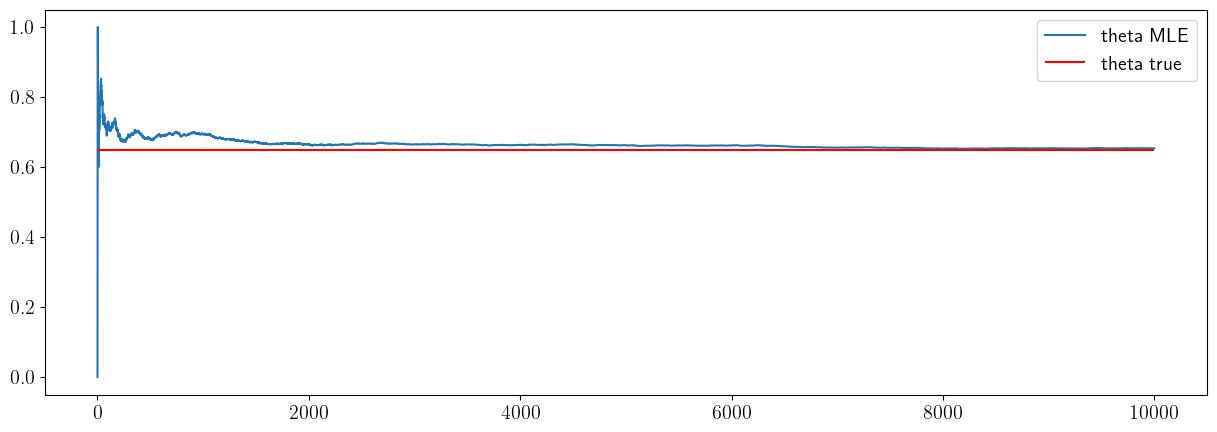

In [11]:
# Consistency

#choose a true probability theta
theta_true=0.65

#Choose a maximum sample size
sample_size_max=10000

#preallocate vector of sample sizes
theta_hat_mle_vec=np.zeros([sample_size_max,1])

#Flip the coin for the maximums number of times (sample_size_max)
x=stats.bernoulli.rvs(p=theta_true,size=sample_size_max)

# let's compute the sample variance as a function of sample size (or number of draws)
for n in np.arange(1,sample_size_max):    
    
    #count the ones and zeros
    N0=sum(x[0:n]==0)
    N1=sum(x[0:n]==1)

    # estimate theta using the MLE estimator
    theta_hat_mle_vec[n]=N1/(N0+N1)
    
fig, ax = plt.subplots(1, 1)

ax.plot(theta_hat_mle_vec,label='theta MLE')
ax.hlines(theta_true,xmin=0,xmax=sample_size_max,color='r',label='theta true')
#ax.grid()
#ax.set_xlabel('sample size N')
ax.legend()
#ax.set_ylabel('sample variance')

### Bias
the cell below checks whether the estimator is biased, i.e. whether $E(\hat\theta_{mle})=\theta$

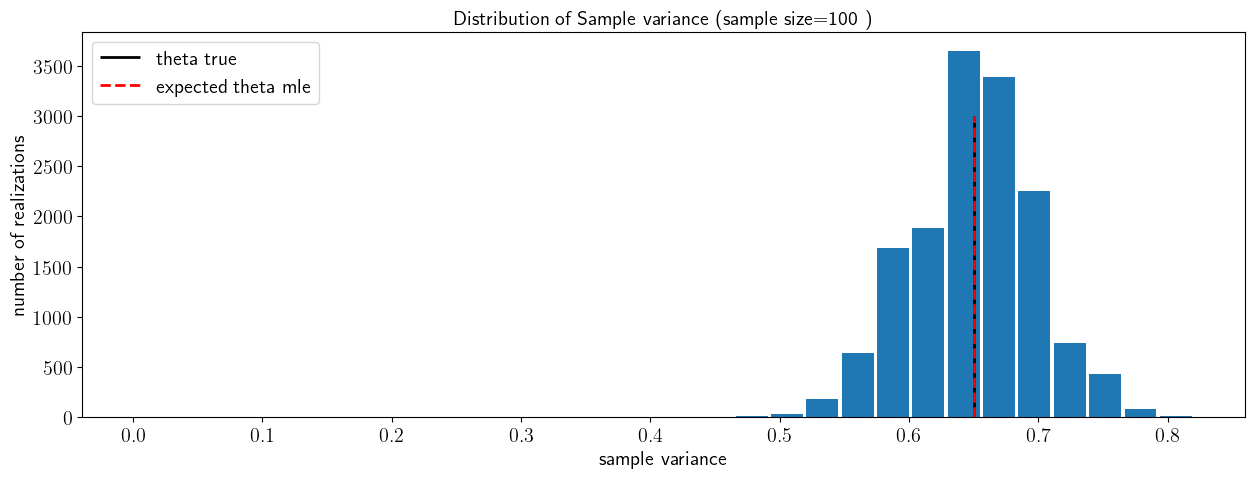

In [17]:
# Bias

# True theta
theta_true=0.65

# sample size and number of samples
sample_size=100
nsamples=15000

# preallocate vector of MLE estimates:
theta_hat_mle_vec=np.zeros([nsamples,1])

# compute a number nsamples of sample means
for n in np.arange(1,nsamples):
    x=stats.bernoulli.rvs(p=theta_true,size=sample_size)
    N0=sum(x==0)
    N1=sum(x==1)
    theta_hat_mle_vec[n]=N1/(N0+N1)


    
fig, ax = plt.subplots(1, 1)

ax.hist(theta_hat_mle_vec,30,rwidth=0.9)
ax.vlines(theta_true,ymin=0,ymax=nsamples/5,colors='k',linewidth=2,label='theta true')
ax.vlines(np.mean(theta_hat_mle_vec),ymin=0,ymax=nsamples/5,colors='r',linewidth=2,linestyle='--',label='expected theta mle')
ax.set_xlabel('sample variance')
ax.set_ylabel('number of realizations')
ax.set_title('Distribution of Sample variance (sample size=100 )')
ax.legend()
#ax.set_xlim(left=0,right=0.5)

## Gaussian Distribution

Now let's consider the case where we are assuming the data is drawn from a Gaussian/Normal random variable, which is defined in terms of two parameters: its mean $\mu$ and variance $\sigma$. 

Say we have $N$ data $x_i,i\in {1,N}$  the data vector $\mathbf{x}$. Assuming the data points were independent, the likelihood of obtaining the data $x$ from a gaussian with parameters $\theta={\mu,\sigma}$ is:

$$\mathcal{L}=p(\mathbf{x}|\theta)=\prod_{i=1}^{N}p(x_{i}|\mu,\sigma)=\prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left[-\frac{1}{2}\left(\frac{x_{i}-\mu}{\sigma}\right)^{2}\right]$$

It is often more convenient to work with the log likelihood. This is both because it transforms products into sums, and gets rid of exponentials, but also because, by virtue of being a product of numbers less than on, the regular likelihood ends up being very small for large datasets, leading to numerical errors. Since the logarithm is a monotonic function, maximizing the log likelihood is the same as maximizing the likelihood itself. For the gaussian distribution the log-likelihood is:

$$ \log\mathcal{L}=-\frac{n}{2}\log\left(2\pi\right)-\sigma-\frac{1}{2\sigma^{2}}\sum\left(x_{i}-\mu\right)^{2}$$ 


### Likelihood as a function of the mean.
In the cell below we will visualize how the likelihood of a dataset $x$ containing $N=20$ draws changes as a function of $\mu$. At first, we will keep $\sigma$ fixed when computing $p(x|\mu,\sigma)$. 
We will use synthetic data, where we provide $\mu$ and $\sigma$. 

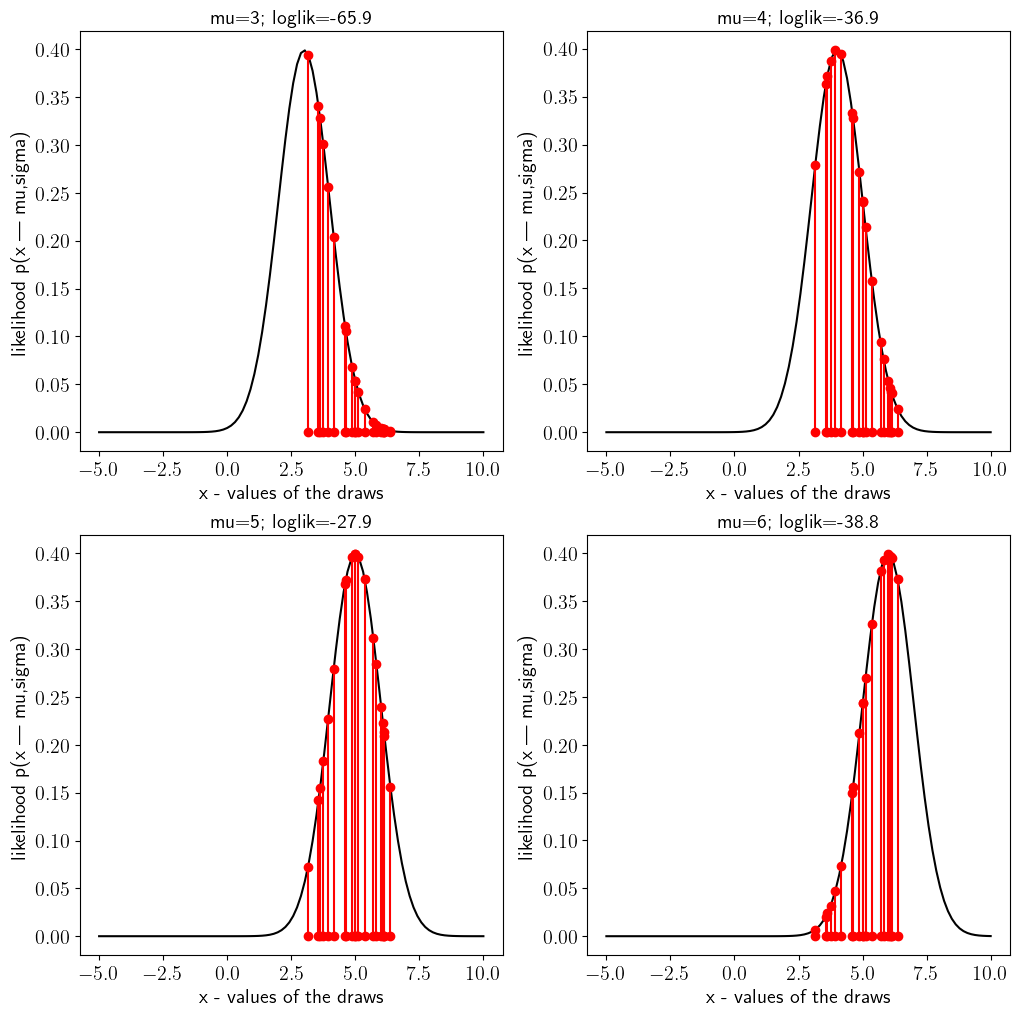

In [177]:
# set parameters for synthetic data 
np.random.seed(seed=233421)
mu_true=5
sig_true=1

# generate synthetic data
Nsamples=20
x=stats.norm.rvs(loc=mu_true, scale=sig_true,size=Nsamples)

# we will evalute the likelihood for four values of mu. 
mu_vec=[3,4,5,6]

# make a plot
figure,axs=plt.subplots(2,2,figsize=[12,12])

# points at which to plot the df
x_support=np.linspace(-5,10,100)

#cycle over the four possible values of mu
for j in range(4):
    plt.subplot(2,2,j+1)
    
    # plot the probability of a gaussian
    pdf=stats.norm.pdf(x_support,loc=mu_vec[j],scale=sig_true)
    plt.plot(x_support,pdf,'k')
    
    # for every sample in the data x, plot the data and the value of the likelihood for that data point
    for k in range(len(x)):
        plt.plot([x[k],x[k]],[0,stats.norm.pdf(x[k],loc=mu_vec[j],scale=sig_true)],'r-o')
        
    #compute the total log likelihood
    loglik=(np.sum(np.log(stats.norm.pdf(x,loc=mu_vec[j],scale=sig_true))))
    
    plt.xlabel('x - values of the draws')
    plt.ylabel('likelihood p(x | mu,sigma)')
    plt.title('mu='+str(mu_vec[j])+';  loglik='+str(round(loglik,1)))

Notice that when the guess for $\mu$ is much smaller than the truth, the likelihood of obtaining the data is small, because a lot of the draws are in the tail of the distribution, where the probability is low. 

### Likelihood as a function of scale
In the cell below we will visualize how the likelihood of a dataset $x$ containing $N=20$ draws changes as a function of $\sigma$. At first, we will keep $\sigma$ fixed when computing $p(x|\mu,\sigma)$. 
We will use synthetic data, where we provide $\mu$ and $\sigma$. 

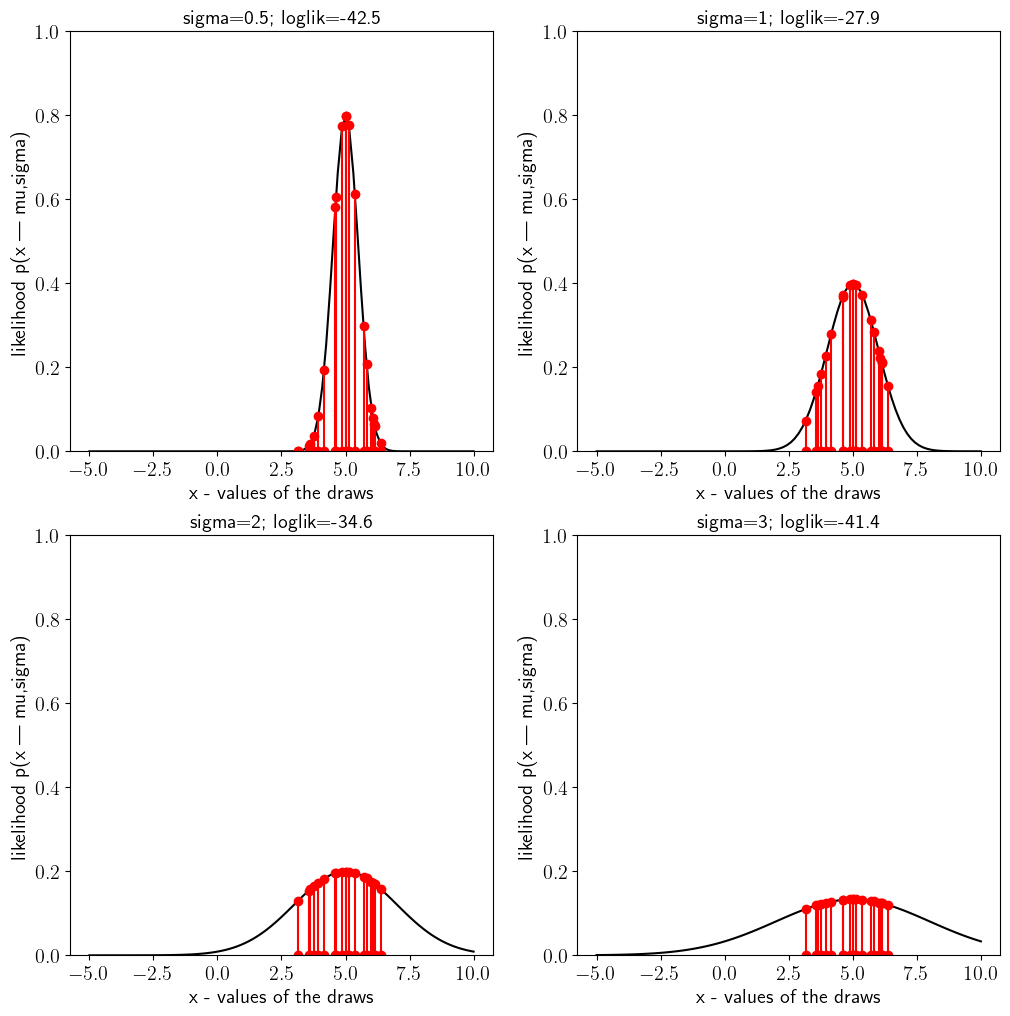

In [178]:
np.random.seed(seed=233421)
mu_true=5
sig_true=1
Nsamples=20

x=stats.norm.rvs(loc=mu_true, scale=sig_true,size=Nsamples)


sig_vec=[0.5,1,2,3]

figure,axs=plt.subplots(2,2,figsize=[12,12])
x_support=np.linspace(-5,10,100)

#cycle over four possible values of mu
for j in range(4):
    plt.subplot(2,2,j+1)
    
    # plot the pdf of a gaussian 
    pdf=stats.norm.pdf(x_support,loc=mu_true,scale=sig_vec[j])
    plt.plot(x_support,pdf,'k')
    plt.ylim(0,1)
    
    # for every sample in the data x, plot the data and the value of the likelihood for that data point
    for k in range(len(x)):
        plt.plot([x[k],x[k]],[0,stats.norm.pdf(x[k],loc=mu_true,scale=sig_vec[j])],'r-o')
        
    #compute the total likelihood
    loglik=(np.sum(np.log(stats.norm.pdf(x,loc=mu_true,scale=sig_vec[j]))))
    
    plt.xlabel('x - values of the draws')
    plt.ylabel('likelihood p(x | mu,sigma)')
    plt.title('sigma='+str(sig_vec[j])+';  loglik='+str(round(loglik,1)))

### MLE estimates for a Gaussian:

We can easily check that for data drawn from a gaussian distribution, the MLE estimates are:

$$\hat\mu_{mle}=\frac{1}{n}\sum_{i=1}^n X_i$$ 


$$\hat\sigma_{mle}=\frac{1}{n}\sum_{i=1}^n(X_i-\hat\mu_{mle})^2$$ 

which are the sample mean and the (biased) sample variance. 